(test-functions:webster-2d)=
# Two-Dimensional Function from Webster et al. (1996)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The 2D function introduced in {cite}`Webster1996` is a polynomial function.
It was used to illustrate the construction of a polynomial chaos expansion
metamodel (via stochastic collocation)
having uncertain (random) input variables.

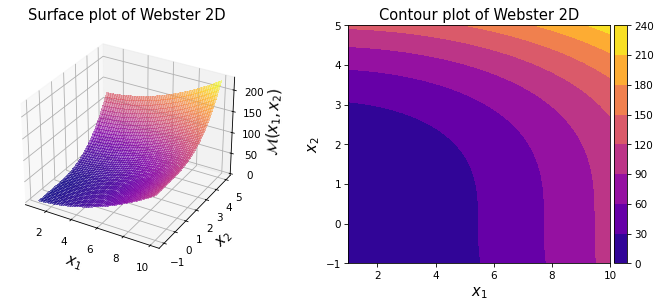

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

my_fun = uqtf.Webster2D()

# --- Create 2D data
lb_1 = my_fun.prob_input.marginals[0].lower
ub_1 = my_fun.prob_input.marginals[0].upper
lb_2 = (
    my_fun.prob_input.marginals[1].parameters[0]
    - 3 * my_fun.prob_input.marginals[1].parameters[1]
)
ub_2 = (
    my_fun.prob_input.marginals[1].parameters[0]
    + 3 * my_fun.prob_input.marginals[1].parameters[1]
)

xx_1 = np.linspace(lb_1, ub_1, 1000)[:, np.newaxis]
xx_2 = np.linspace(lb_2, ub_2, 1000)[:, np.newaxis]
mesh_2d = np.meshgrid(xx_1, xx_2)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_fun(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(10, 5))

# Surface
axs_1 = plt.subplot(121, projection='3d')
axs_1.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_1.set_xlabel("$x_1$", fontsize=14)
axs_1.set_ylabel("$x_2$", fontsize=14)
axs_1.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_1.set_title("Surface plot of Webster 2D", fontsize=14)

# Contour
axs_2 = plt.subplot(122)
cf = axs_2.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_2.set_xlim([lb_1, ub_1])
axs_2.set_ylim([lb_2, ub_2])
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_title("Contour plot of Webster 2D", fontsize=14)
divider = make_axes_locatable(axs_2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')

fig.tight_layout(pad=4.0)
plt.gcf().set_dpi(75);

## Test function instance

To create a default instance of the test function:

In [3]:
my_testfun = uqtf.Webster2D()

Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Webster2D
Spatial dimension : 2
Description       : 2D polynomial function from Webster et al. (1996).


## Description

The Webster 2D function is defined as follows[^location]:

$$
\mathcal{M}(\boldsymbol{x}) = A^2 + B^3,
$$
where $\boldsymbol{x} = \{ A, B \}$
is the two-dimensional vector of input variables further defined below.

## Probabilistic input

Based on {cite}`Webster1996`, the probabilistic input model
for the function consists of two independent random variables as shown below.

In [5]:
my_testfun.prob_input

ProbInput(spatial_dimension=2, marginals=(UnivDist(distribution='uniform', parameters=array([ 1., 10.]), name='A', description='None'), UnivDist(distribution='normal', parameters=array([2., 1.]), name='B', description='None')), copulas=None, name='Webster1996', description='Input specification for the 2D function from Webster et al. (1996)')

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

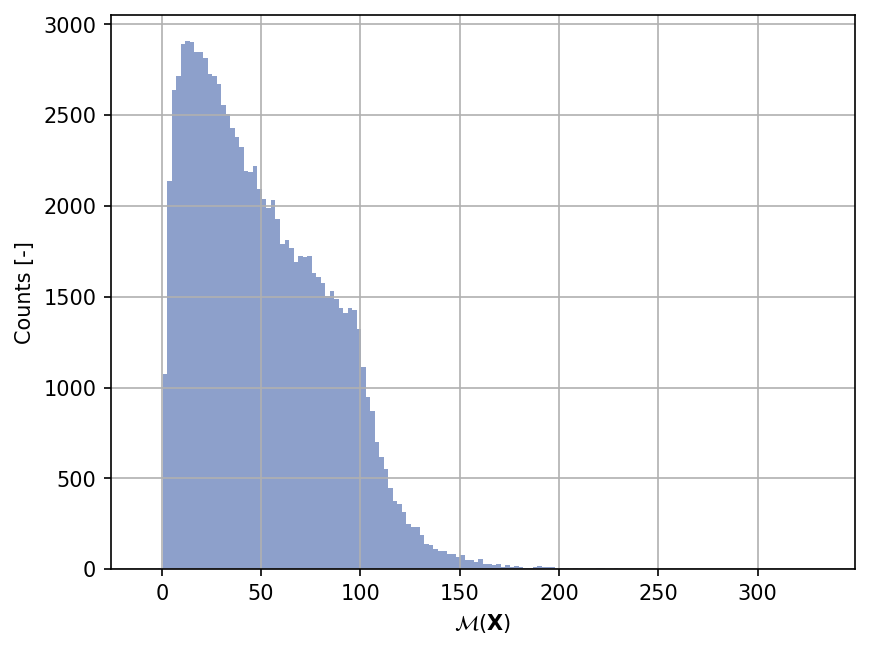

In [6]:
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

## References

```{bibliography}
:filter: docname in docnames
```

[^location]: see Eq. (8), Section 2.2, p. 4 in {cite}`Webster1996`.